In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
groceries = pd.read_csv("E:/DataScience/Assignments/Association Rules/groceries.csv", header=None)

In [3]:
groceries

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
groceries = pd.get_dummies(groceries)

In [8]:
groceries

,0_Instant food products,0_UHT-milk,0_abrasive cleaner,0_artif. sweetener,0_baby cosmetics,0_bags,0_baking powder,0_bathroom cleaner,0_beef,0_berries,...,27_chocolate,27_hygiene articles,27_napkins,27_sugar,28_cooking chocolate,28_house keeping products,28_soups,29_skin care,30_hygiene articles,31_candles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
groceries.mean()

0_Instant food products      0.000610
0_UHT-milk                   0.007117
0_abrasive cleaner           0.000203
0_artif. sweetener           0.000305
0_baby cosmetics             0.000102
                               ...   
28_house keeping products    0.000203
28_soups                     0.000102
29_skin care                 0.000102
30_hygiene articles          0.000102
31_candles                   0.000102
Length: 2201, dtype: float64

In [11]:
frequent_itemsets = apriori(groceries, min_support=0.007, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.007117,(0_UHT-milk)
1,0.030910,(0_beef)
2,0.012303,(0_berries)
3,0.008134,(0_beverages)
4,0.018099,(0_bottled beer)
...,...,...
148,0.017285,"(3_whole milk, 2_other vegetables)"
149,0.008846,"(3_other vegetables, 2_root vegetables)"
150,0.007422,"(2_whole milk, 3_yogurt)"
151,0.010574,"(3_other vegetables, 4_whole milk)"


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_tropical fruit),(0_citrus fruit),0.036096,0.046060,0.011591,0.321127,6.971924,0.009929,1.405181
1,(0_citrus fruit),(1_tropical fruit),0.046060,0.036096,0.011591,0.251656,6.971924,0.009929,1.288049
2,(0_frankfurter),(1_sausage),0.058973,0.010066,0.010066,0.170690,16.956897,0.009472,1.193683
3,(1_sausage),(0_frankfurter),0.010066,0.058973,0.010066,1.000000,16.956897,0.009472,inf
4,(0_other vegetables),(1_whole milk),0.046772,0.066497,0.014032,0.300000,4.511468,0.010921,1.333575
5,(1_whole milk),(0_other vegetables),0.066497,0.046772,0.014032,0.211009,4.511468,0.010921,1.208161
6,(1_other vegetables),(0_root vegetables),0.055923,0.029283,0.008134,0.145455,4.967172,0.006497,1.135945
7,(0_root vegetables),(1_other vegetables),0.029283,0.055923,0.008134,0.277778,4.967172,0.006497,1.307184
8,(2_whole milk),(0_sausage),0.051449,0.083884,0.007321,0.142292,1.696299,0.003005,1.068098
9,(0_sausage),(2_whole milk),0.083884,0.051449,0.007321,0.087273,1.696299,0.003005,1.039249


In [15]:
rules.drop_duplicates(subset=['support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_tropical fruit),(0_citrus fruit),0.036096,0.046060,0.011591,0.321127,6.971924,0.009929,1.405181
2,(0_frankfurter),(1_sausage),0.058973,0.010066,0.010066,0.170690,16.956897,0.009472,1.193683
4,(0_other vegetables),(1_whole milk),0.046772,0.066497,0.014032,0.300000,4.511468,0.010921,1.333575
6,(1_other vegetables),(0_root vegetables),0.055923,0.029283,0.008134,0.145455,4.967172,0.006497,1.135945
8,(2_whole milk),(0_sausage),0.051449,0.083884,0.007321,0.142292,1.696299,0.003005,1.068098
10,(0_tropical fruit),(1_whole milk),0.049009,0.066497,0.007728,0.157676,2.371173,0.004469,1.108247
12,(1_other vegetables),(2_whole milk),0.055923,0.051449,0.018302,0.327273,6.361121,0.015425,1.410008
14,(1_root vegetables),(2_other vegetables),0.038943,0.042196,0.012506,0.321149,7.610840,0.010863,1.410919
16,(2_whole milk),(1_root vegetables),0.051449,0.038943,0.008338,0.162055,4.161395,0.006334,1.146922
18,(1_tropical fruit),(2_pip fruit),0.036096,0.014947,0.007931,0.219718,14.700201,0.007391,1.262433


In [27]:
x = rules.support
y = rules.confidence

Text(0, 0.5, 'confidence')

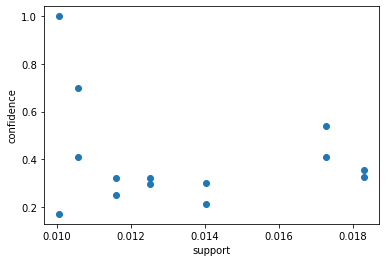

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel('support')
plt.ylabel('confidence')

(array([4., 2., 2., 0., 2., 0., 0., 0., 2., 2.]),
 array([0.01006609, 0.01088968, 0.01171327, 0.01253686, 0.01336045,
        0.01418404, 0.01500763, 0.01583122, 0.0166548 , 0.01747839,
        0.01830198]),
 <a list of 10 Patch objects>)

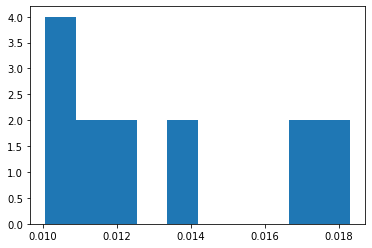

In [30]:
plt.hist(x)

(array([3., 5., 3., 0., 1., 0., 1., 0., 0., 1.]),
 array([0.17068966, 0.25362069, 0.33655172, 0.41948276, 0.50241379,
        0.58534483, 0.66827586, 0.7512069 , 0.83413793, 0.91706897,
        1.        ]),
 <a list of 10 Patch objects>)

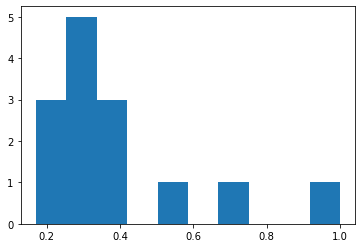

In [31]:
plt.hist(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x24781558e80>,
 'caps': [<matplotlib.lines.Line2D at 0x247815665b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24781558b20>],
 'medians': [<matplotlib.lines.Line2D at 0x24781566c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x24781566f70>],
 'means': []}

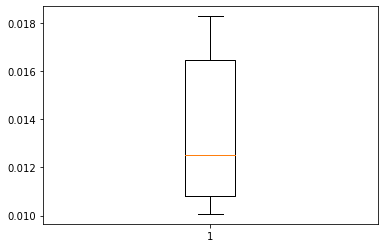

In [32]:
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x247815b2c70>,
 'caps': [<matplotlib.lines.Line2D at 0x247815c0370>,
 'boxes': [<matplotlib.lines.Line2D at 0x247815b2910>],
 'medians': [<matplotlib.lines.Line2D at 0x247815c0a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x247815c0d30>],
 'means': []}

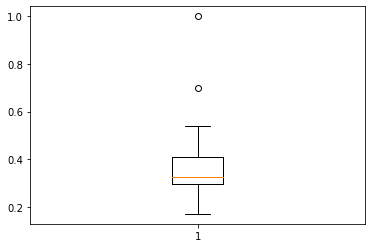

In [33]:
plt.boxplot(y)

In [18]:
f_itemset = apriori(groceries, min_support=0.009, use_colnames=True)
f_itemset

,support,itemsets
0,0.030910,(0_beef)
1,0.012303,(0_berries)
2,0.018099,(0_bottled beer)
3,0.017285,(0_bottled water)
4,0.031520,(0_canned beer)
...,...,...
99,0.018302,"(1_other vegetables, 2_whole milk)"
100,0.012506,"(1_root vegetables, 2_other vegetables)"
101,0.009253,"(2_yogurt, 1_whole milk)"
102,0.017285,"(3_whole milk, 2_other vegetables)"


In [19]:
frequentitemsets = apriori(groceries, min_support=0.01, use_colnames=True)
frequentitemsets

,support,itemsets
0,0.030910,(0_beef)
1,0.012303,(0_berries)
2,0.018099,(0_bottled beer)
3,0.017285,(0_bottled water)
4,0.031520,(0_canned beer)
...,...,...
81,0.014032,"(0_other vegetables, 1_whole milk)"
82,0.018302,"(1_other vegetables, 2_whole milk)"
83,0.012506,"(1_root vegetables, 2_other vegetables)"
84,0.017285,"(3_whole milk, 2_other vegetables)"


In [20]:
rules = association_rules(frequentitemsets, metric="lift", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_tropical fruit),(0_citrus fruit),0.036096,0.046060,0.011591,0.321127,6.971924,0.009929,1.405181
1,(0_citrus fruit),(1_tropical fruit),0.046060,0.036096,0.011591,0.251656,6.971924,0.009929,1.288049
2,(0_frankfurter),(1_sausage),0.058973,0.010066,0.010066,0.170690,16.956897,0.009472,1.193683
3,(1_sausage),(0_frankfurter),0.010066,0.058973,0.010066,1.000000,16.956897,0.009472,inf
4,(0_other vegetables),(1_whole milk),0.046772,0.066497,0.014032,0.300000,4.511468,0.010921,1.333575
5,(1_whole milk),(0_other vegetables),0.066497,0.046772,0.014032,0.211009,4.511468,0.010921,1.208161
6,(1_other vegetables),(2_whole milk),0.055923,0.051449,0.018302,0.327273,6.361121,0.015425,1.410008
7,(2_whole milk),(1_other vegetables),0.051449,0.055923,0.018302,0.355731,6.361121,0.015425,1.465347
8,(1_root vegetables),(2_other vegetables),0.038943,0.042196,0.012506,0.321149,7.610840,0.010863,1.410919
9,(2_other vegetables),(1_root vegetables),0.042196,0.038943,0.012506,0.296386,7.610840,0.010863,1.365886


In [21]:
rules.drop_duplicates(subset=['support'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_tropical fruit),(0_citrus fruit),0.036096,0.046060,0.011591,0.321127,6.971924,0.009929,1.405181
2,(0_frankfurter),(1_sausage),0.058973,0.010066,0.010066,0.170690,16.956897,0.009472,1.193683
4,(0_other vegetables),(1_whole milk),0.046772,0.066497,0.014032,0.300000,4.511468,0.010921,1.333575
6,(1_other vegetables),(2_whole milk),0.055923,0.051449,0.018302,0.327273,6.361121,0.015425,1.410008
8,(1_root vegetables),(2_other vegetables),0.038943,0.042196,0.012506,0.321149,7.610840,0.010863,1.410919
10,(3_whole milk),(2_other vegetables),0.032028,0.042196,0.017285,0.539683,12.789826,0.015934,2.080746
12,(3_other vegetables),(4_whole milk),0.025826,0.015150,0.010574,0.409449,27.026370,0.010183,1.667679


In [23]:
rules.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(3_other vegetables),(4_whole milk),0.025826,0.015150,0.010574,0.409449,27.026370,0.010183,1.667679
13,(4_whole milk),(3_other vegetables),0.015150,0.025826,0.010574,0.697987,27.026370,0.010183,3.225598
2,(0_frankfurter),(1_sausage),0.058973,0.010066,0.010066,0.170690,16.956897,0.009472,1.193683
3,(1_sausage),(0_frankfurter),0.010066,0.058973,0.010066,1.000000,16.956897,0.009472,inf
10,(3_whole milk),(2_other vegetables),0.032028,0.042196,0.017285,0.539683,12.789826,0.015934,2.080746
11,(2_other vegetables),(3_whole milk),0.042196,0.032028,0.017285,0.409639,12.789826,0.015934,1.639625
8,(1_root vegetables),(2_other vegetables),0.038943,0.042196,0.012506,0.321149,7.610840,0.010863,1.410919
9,(2_other vegetables),(1_root vegetables),0.042196,0.038943,0.012506,0.296386,7.610840,0.010863,1.365886
1,(0_citrus fruit),(1_tropical fruit),0.046060,0.036096,0.011591,0.251656,6.971924,0.009929,1.288049
0,(1_tropical fruit),(0_citrus fruit),0.036096,0.046060,0.011591,0.321127,6.971924,0.009929,1.405181


In [34]:
x = rules.support
y = rules.confidence

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

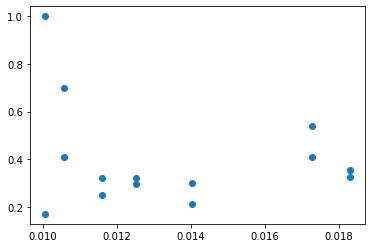

In [35]:
plt.scatter(x,y)
plt.xlable(x)
plt.ylabel(y)

(array([4., 2., 2., 0., 2., 0., 0., 0., 2., 2.]),
 array([0.01006609, 0.01088968, 0.01171327, 0.01253686, 0.01336045,
        0.01418404, 0.01500763, 0.01583122, 0.0166548 , 0.01747839,
        0.01830198]),
 <a list of 10 Patch objects>)

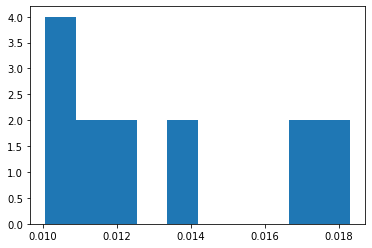

In [36]:
plt.hist(x)

(array([3., 5., 3., 0., 1., 0., 1., 0., 0., 1.]),
 array([0.17068966, 0.25362069, 0.33655172, 0.41948276, 0.50241379,
        0.58534483, 0.66827586, 0.7512069 , 0.83413793, 0.91706897,
        1.        ]),
 <a list of 10 Patch objects>)

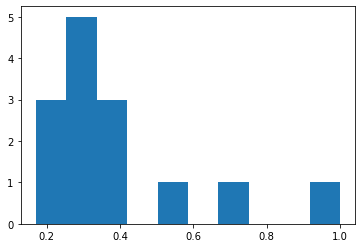

In [37]:
plt.hist(y)

{'whiskers': [<matplotlib.lines.Line2D at 0x2478172f970>,
 'caps': [<matplotlib.lines.Line2D at 0x2478173d070>,
 'boxes': [<matplotlib.lines.Line2D at 0x2478172f610>],
 'medians': [<matplotlib.lines.Line2D at 0x2478173d730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2478173da30>],
 'means': []}

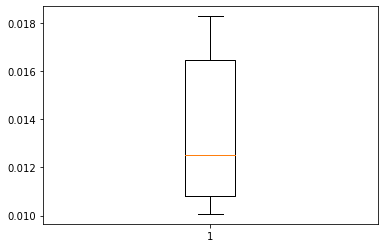

In [38]:
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x2478178d700>,
 'caps': [<matplotlib.lines.Line2D at 0x2478178ddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2478178d3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x247817974c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x247817977c0>],
 'means': []}

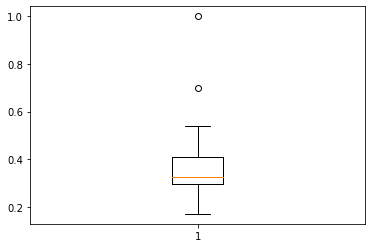

In [39]:
plt.boxplot(y)